In [22]:
import pandas as pd
import numpy as np
import keras
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
train =  pd.read_csv('data/fashion-mnist_train.csv')
test = pd.read_csv('data/fashion-mnist_test.csv')

rows, cols = 28, 28
input_shape = (rows, cols, 1)

X = np.array(train.iloc[:, 1:])
Y = to_categorical(np.array(train.iloc[:, 0]))


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=13)


X_test = np.array(test.iloc[:, 1:])
Y_test = to_categorical(np.array(test.iloc[:, 0]))
X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)
X_val = X_val.reshape(X_val.shape[0], rows, cols, 1)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

batch_size = 256
num_classes = 10
epochs = 50

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3) ,
    activation='relu' ,
    kernel_initializer='he_normal' ,
    input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [13]:
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 92s 2ms/step - loss: 0.9065 - acc: 0.6593 - val_loss: 0.5443 - val_acc: 0.7989
Epoch 2/50
48000/48000 [==============================] - 70s 1ms/step - loss: 0.5411 - acc: 0.7963 - val_loss: 0.4451 - val_acc: 0.8397
Epoch 3/50
48000/48000 [==============================] - 70s 1ms/step - loss: 0.4711 - acc: 0.8235 - val_loss: 0.3924 - val_acc: 0.8549
Epoch 4/50
48000/48000 [==============================] - 68s 1ms/step - loss: 0.4267 - acc: 0.8424 - val_loss: 0.3522 - val_acc: 0.8652
Epoch 5/50
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3912 - acc: 0.8566 - val_loss: 0.3301 - val_acc: 0.8772
Epoch 6/50
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3702 - acc: 0.8657 - val_loss: 0.3129 - val_acc: 0.8831
Epoch 7/50
48000/48000 [==============================] - 71s 1ms/step - loss: 0.3525 - acc: 0.8720 - val_loss: 0.3055 - val_acc

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.192928625667
Test accuracy: 0.9286


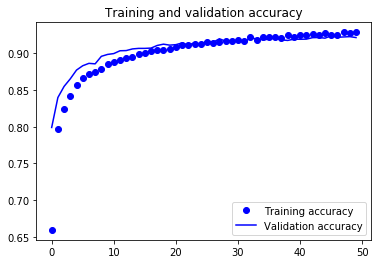

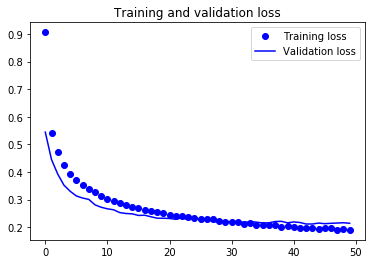

In [15]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
predicted_classes = model.predict_classes(X_test)

y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.90      0.87      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.90      0.88      0.89      1000
    Class 3       0.90      0.95      0.93      1000
    Class 4       0.89      0.90      0.90      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.80      0.78      0.79      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.98      0.99      0.98      1000
    Class 9       0.96      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



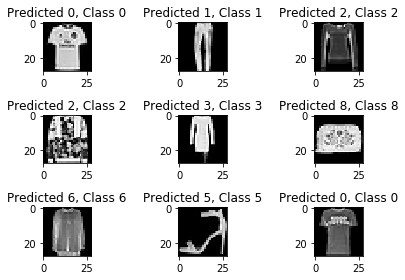

In [19]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

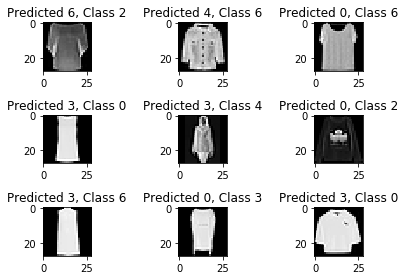

In [20]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

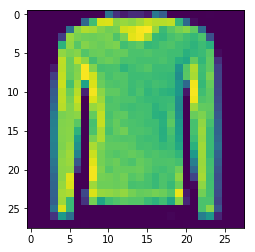

In [21]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

c:\users\david ojo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


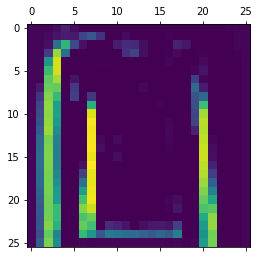

In [23]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

c:\users\david ojo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


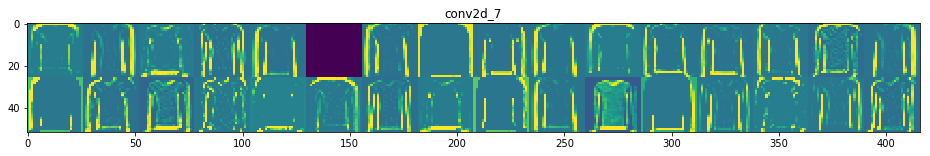

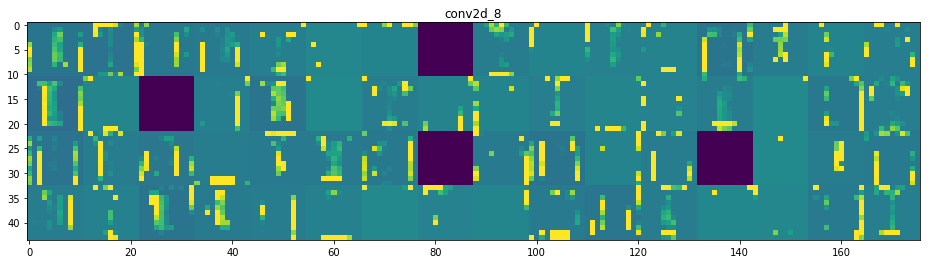

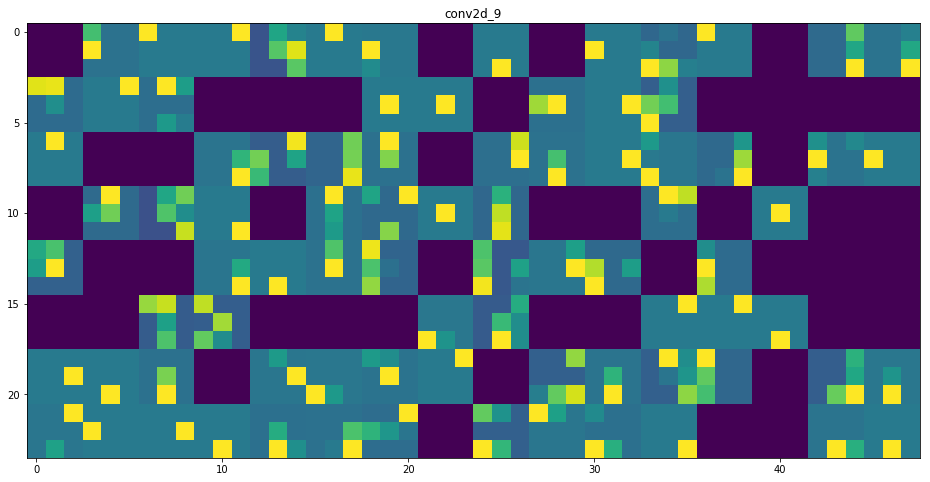

In [24]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')